In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import sklearn as sk

import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()

C:\Users\USER\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Load Data

In [2]:
train2016 = pd.read_csv("train_2016_v2.csv", parse_dates=["transactiondate"])
print(train2016.shape)
train2016.tail()

(90275, 3)


,parcelid,logerror,transactiondate
90270,10774160,-0.0356,2016-12-30
90271,12046695,0.0070,2016-12-30
90272,12995401,-0.2679,2016-12-30
90273,11402105,0.0602,2016-12-30
90274,12566293,0.4207,2016-12-30


In [3]:
train2017 = pd.read_csv("train_2017.csv", parse_dates=["transactiondate"])
print(train2017.shape)
train2017.tail()

(77613, 3)


,parcelid,logerror,transactiondate
77608,10833991,-0.002245,2017-09-20
77609,11000655,0.020615,2017-09-20
77610,17239384,0.013209,2017-09-21
77611,12773139,0.037129,2017-09-21
77612,12826780,0.007204,2017-09-25


### 125 houses were sold more than once in 2016

In [4]:
num_unique_id = len(train2016["parcelid"].unique())
multi_sales = len(train2016["parcelid"]) - num_unique_id
print(num_unique_id, multi_sales)

90150 125


In [5]:
train2016.nunique()

parcelid           90150
logerror            1894
transactiondate      352
dtype: int64

### Divide transaction date by year, month, and day

In [6]:
train2016["transactiondate-year"] = train2016["transactiondate"].dt.year
train2016["transactiondate-month"] = train2016["transactiondate"].dt.month
train2016["transactiondate-day"] = train2016["transactiondate"].dt.day

print(train2016.shape)
train2016.tail()

(90275, 6)


,parcelid,logerror,transactiondate,transactiondate-year,transactiondate-month,transactiondate-day
90270,10774160,-0.0356,2016-12-30,2016,12,30
90271,12046695,0.0070,2016-12-30,2016,12,30
90272,12995401,-0.2679,2016-12-30,2016,12,30
90273,11402105,0.0602,2016-12-30,2016,12,30
90274,12566293,0.4207,2016-12-30,2016,12,30


In [7]:
month_sale_count = train2016.groupby('transactiondate-month').count()
month_sale_count = month_sale_count.reset_index()
month_sale_count["count"] = month_sale_count["parcelid"]
month_sale_count[["transactiondate-month", "parcelid", "count"]].head()

,transactiondate-month,parcelid,count
0,1,6556,6556
1,2,6333,6333
2,3,8652,8652
3,4,9311,9311
4,5,9961,9961


In [8]:
day_sale_count = train2016.groupby('transactiondate-day').count()
day_sale_count = day_sale_count.reset_index()
day_sale_count["count"] = day_sale_count["parcelid"]
day_sale_count[["transactiondate-day", "parcelid", "count"]].head()

,transactiondate-day,parcelid,count
0,1,3784,3784
1,2,2422,2422
2,3,2498,2498
3,4,2319,2319
4,5,2571,2571


In [9]:
train2017["transactiondate-year"] = train2017["transactiondate"].dt.year
train2017["transactiondate-month"] = train2017["transactiondate"].dt.month
train2017["transactiondate-day"] = train2017["transactiondate"].dt.day

print(train2017.shape)
train2017.tail()

(77613, 6)


,parcelid,logerror,transactiondate,transactiondate-year,transactiondate-month,transactiondate-day
77608,10833991,-0.002245,2017-09-20,2017,9,20
77609,11000655,0.020615,2017-09-20,2017,9,20
77610,17239384,0.013209,2017-09-21,2017,9,21
77611,12773139,0.037129,2017-09-21,2017,9,21
77612,12826780,0.007204,2017-09-25,2017,9,25


In [10]:
month_sale_count2 = train2017.groupby('transactiondate-month').count()
month_sale_count2 = month_sale_count2.reset_index()
month_sale_count2["count"] = month_sale_count2["parcelid"]
month_sale_count2[["transactiondate-month", "parcelid", "count"]].head()

,transactiondate-month,parcelid,count
0,1,7025,7025
1,2,6412,6412
2,3,9327,9327
3,4,8679,8679
4,5,10487,10487


In [11]:
day_sale_count2 = train2017.groupby('transactiondate-day').count()
day_sale_count2 = day_sale_count2.reset_index()
day_sale_count2["count"] = day_sale_count2["parcelid"]
day_sale_count2[["transactiondate-day", "parcelid", "count"]].head()

,transactiondate-day,parcelid,count
0,1,2779,2779
1,2,1845,1845
2,3,2064,2064
3,4,1500,1500
4,5,2396,2396


### The number of transaction per each month and each day

#### 2016

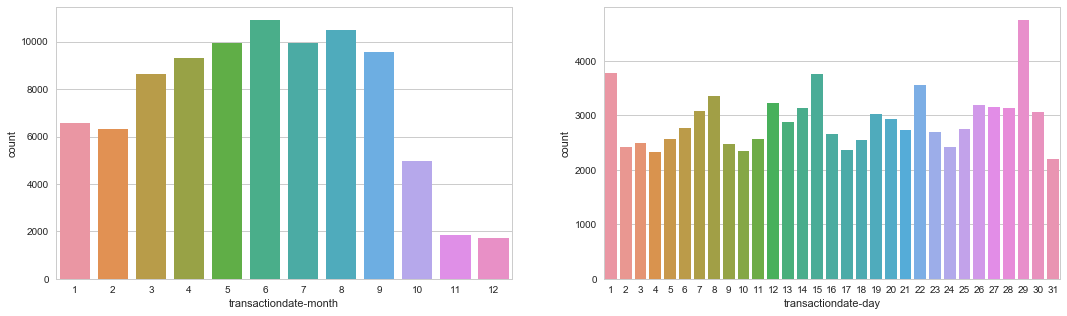

In [12]:
%matplotlib inline
figure, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 5)

sns.barplot(data=month_sale_count, x="transactiondate-month", y="count", ax=ax1)
sns.barplot(data=day_sale_count, x="transactiondate-day", y="count", ax=ax2)

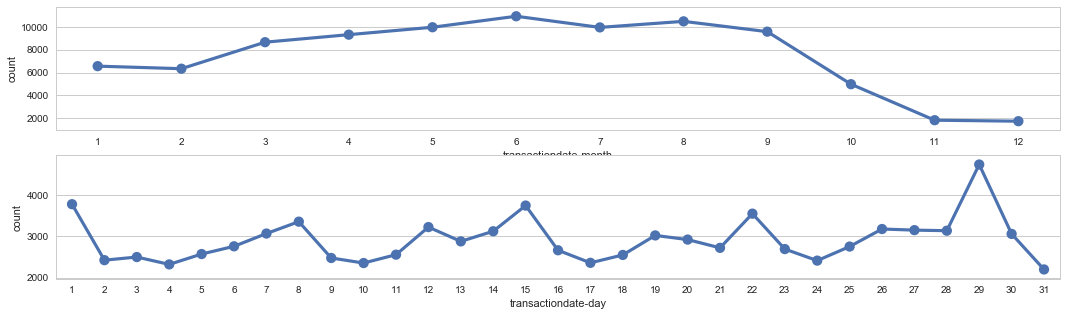

In [13]:
figure, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(18, 5)

sns.pointplot(data=month_sale_count, x="transactiondate-month", y="count", ax=ax1)
sns.pointplot(data=day_sale_count, x="transactiondate-day", y="count", ax=ax2)

#### 2017
- There is not data of 2017-10 ~ 2017-12

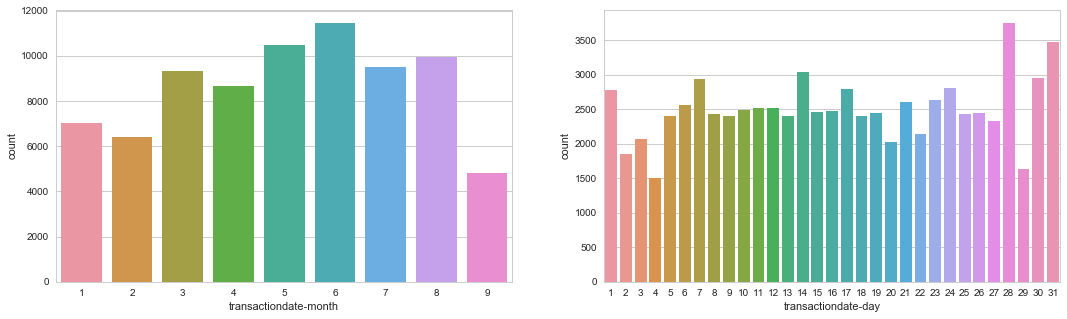

In [14]:
%matplotlib inline
figure, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 5)

sns.barplot(data=month_sale_count2, x="transactiondate-month", y="count", ax=ax1)
sns.barplot(data=day_sale_count2, x="transactiondate-day", y="count", ax=ax2)

### 2016 ~ 2017 each month transaction count

In [15]:
def concatenate_year_month(datetime):
    return "{0}-{1}".format(datetime.year, datetime.month)

train2016["transactiondate-year_month"] = train2016["transactiondate"].apply(concatenate_year_month)

print(train2016.shape)
train2016[["transactiondate", "transactiondate-year_month"]].head()

(90275, 7)


,transactiondate,transactiondate-year_month
0,2016-01-01,2016-1
1,2016-01-01,2016-1
2,2016-01-01,2016-1
3,2016-01-02,2016-1
4,2016-01-02,2016-1


In [16]:
train2017["transactiondate-year_month"] = train2017["transactiondate"].apply(concatenate_year_month)

print(train2017.shape)
train2017[["transactiondate", "transactiondate-year_month"]].head()

(77613, 7)


,transactiondate,transactiondate-year_month
0,2017-01-01,2017-1
1,2017-01-01,2017-1
2,2017-01-01,2017-1
3,2017-01-01,2017-1
4,2017-01-01,2017-1


In [17]:
md_sale_count = train2016.groupby('transactiondate-year_month').count()
md_sale_count = pd.DataFrame(md_sale_count["parcelid"], index=['2016-1', '2016-2', '2016-3', '2016-4', '2016-5', '2016-6',\
                                                               '2016-7', '2016-8', '2016-9', '2016-10', '2016-11', '2016-12'])

md_sale_count["count"] = md_sale_count["parcelid"]
md_sale_count.drop("parcelid", axis=1, inplace=True)
md_sale_count

,count
2016-1,6556
2016-2,6333
2016-3,8652
2016-4,9311
2016-5,9961
2016-6,10922
2016-7,9947
2016-8,10476
2016-9,9575
2016-10,4977


In [18]:
md_sale_count2 = train2017.groupby('transactiondate-year_month').count()
md_sale_count2 = pd.DataFrame(md_sale_count2["parcelid"], index=['2017-1', '2017-2', '2017-3', '2017-4', '2017-5', '2017-6',\
                                                               '2017-7', '2017-8', '2017-9', '2017-10', '2017-11', '2017-12'])

md_sale_count2["count"] = md_sale_count2["parcelid"]
md_sale_count2.drop("parcelid", axis=1, inplace=True)
md_sale_count2

,count
2017-1,7025.0
2017-2,6412.0
2017-3,9327.0
2017-4,8679.0
2017-5,10487.0
2017-6,11456.0
2017-7,9490.0
2017-8,9936.0
2017-9,4801.0
2017-10,NaN


In [19]:
md_sale_count3 = pd.concat([md_sale_count, md_sale_count2])
md_sale_count3.head()

,count
2016-1,6556.0
2016-2,6333.0
2016-3,8652.0
2016-4,9311.0
2016-5,9961.0


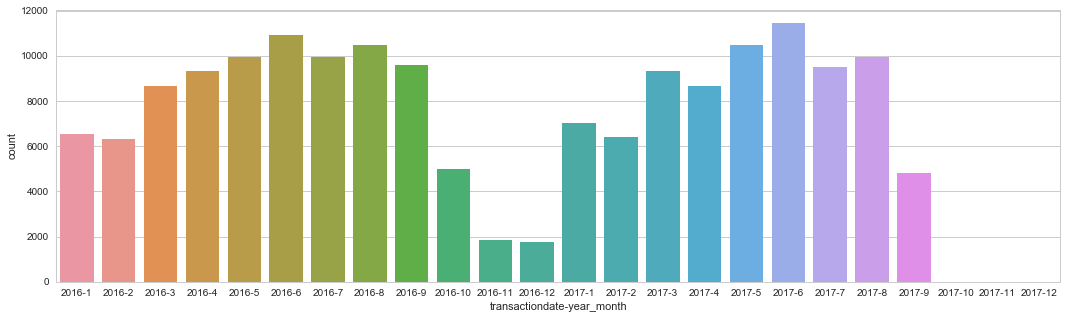

In [20]:
figure, (ax3) = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18, 5)

#sns.barplot(data=month_sale_count, x="transactiondate-month", y="count", ax=ax1)
#sns.barplot(data=month_sale_count2, x="transactiondate-month", y="count", ax=ax2)
sns.barplot(data=md_sale_count3, x=md_sale_count3.index, y="count", ax=ax3)
ax3.set(xlabel='transactiondate-year_month', ylabel='count')

### Logerror

`logerror = log(Zestimate)−log(SalePrice)`

`logerror = log(Zestimate/SalePrice)`

- If the Zestimate equals with SalePrice then, logerror = 0.
- If the Zestimate is larger than SalePrice then, logerror > 0.
- If the Zestimate is smaller than SalePrice then, logerror < 0.

#### It means that the gap of Zestimate and SalePrice is bigger and bigger, absolute value of logerror is also increase.

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


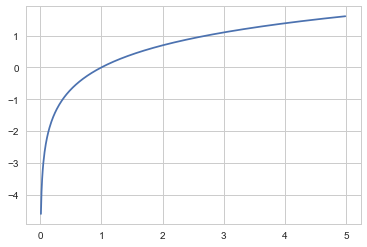

In [21]:
x = np.arange(0, 5, 0.01)
y = np.log(x)

plt.plot(x,y)

#### 2016 logerror max = 4.737000, min = -4.605000
#### 2017 logerror max = 5.262999, min = -4.655420

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


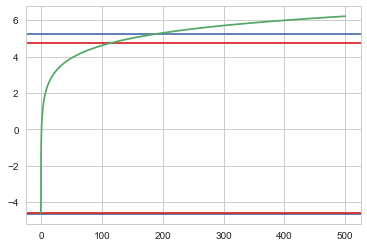

In [22]:
x = np.arange(0, 500, 0.01)
y = np.log(x)

max2016 = 4.737000
max2017 = 5.262999

min2016 = -4.605000
min2017 = -4.655420

#2016 logerror_range
plt.axhline(y=5.262999)
plt.axhline(y=-4.655420)

#2017 logerror_range
plt.axhline(y=4.737000, color='#d62728')
plt.axhline(y=-4.605000, color='#d62728')

plt.plot(x, y, 'g')

In [23]:
train2016["logerror"].describe()

count    90275.000000
mean         0.011457
std          0.161079
min         -4.605000
25%         -0.025300
50%          0.006000
75%          0.039200
max          4.737000
Name: logerror, dtype: float64

In [24]:
train2017["logerror"].describe() 

count    77613.000000
mean         0.016755
std          0.170887
min         -4.655420
25%         -0.024325
50%          0.006670
75%          0.039295
max          5.262999
Name: logerror, dtype: float64

### The mean of logerror in each months in 2016

In [41]:
def abs_log(value):
    return np.abs(value)

abs_logerror = train2016[["logerror", "transactiondate-month"]]
abs_logerror['logerror'] = abs_logerror["logerror"].apply(abs_log)


mean_abs_logerror = []
for month in range(1, 13):
    mean_logerror = np.mean(abs_logerror[abs_logerror['transactiondate-month'] == month])[0]
    mean_abs_logerror.append(mean_logerror)

print(mean_abs_logerror)

[0.072694844417327265, 0.077434470235274791, 0.072043920480813164, 0.069971506819889825, 0.066240989860455429, 0.06615773667826351, 0.065043993163767591, 0.066104257350132936, 0.067278590078328371, 0.064746453686959624, 0.063965224534501722, 0.075951868890166765]


C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [55]:
np.mean(abs_logerror['logerror'])

0.06844671392966638

### The mean of logerror between October and February dramaticaly changed in 2016

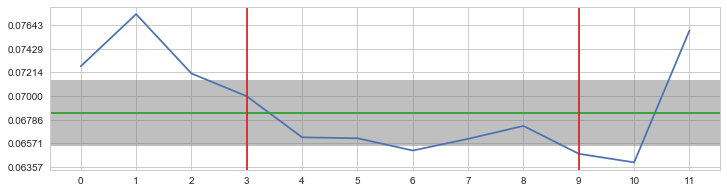

In [98]:
plt.figure(figsize=(12, 3))
plt.plot(mean_abs_logerror)
plt.yticks(np.linspace(0.055, 0.085, 15, endpoint=True))
plt.xticks(np.linspace(0,11,12,endpoint=True))

plt.axhline(y=np.mean(abs_logerror['logerror']), color='#2ca02c')
plt.axhspan(np.mean(abs_logerror['logerror']) - 0.003, np.mean(abs_logerror['logerror']) + 0.003, facecolor='0.5', alpha=0.5)

plt.axvline(x=3, color='#d62728')
plt.axvline(x=9, color='#d62728')

### The mean of logerror in each months in 2017

In [87]:
abs_logerror2 = train2017[["logerror", "transactiondate-month"]]
abs_logerror2['logerror'] = abs_logerror2["logerror"].apply(abs_log)


mean_abs_logerror2 = []
for month in range(1, 13):
    mean_logerror2 = np.mean(abs_logerror2[abs_logerror2['transactiondate-month'] == month])[0]
    mean_abs_logerror2.append(mean_logerror2)

print(mean_abs_logerror2)

[0.074779301683319435, 0.072405869607162041, 0.068973377797676788, 0.068918098581928489, 0.067892964483595802, 0.069202134565718706, 0.063555832672568563, 0.075027565939959323, 0.074683231937805891, nan, nan, nan]


C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [88]:
np.mean(abs_logerror2['logerror'])

0.0701299011564787

### The mean of logerror between June and July dramaticaly changed in 2016
#### and also on December.

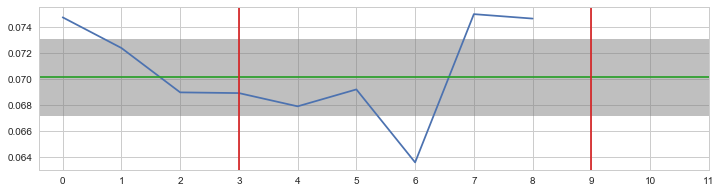

In [99]:
plt.figure(figsize=(12, 3))
plt.plot(mean_abs_logerror2)
#plt.yticks(np.linspace(0.0, 0.09, 15, endpoint=True))
plt.xticks(np.linspace(0,11,12,endpoint=True))

plt.axhline(y=np.mean(abs_logerror2['logerror']), color='#2ca02c')
plt.axhspan(np.mean(abs_logerror2['logerror']) - 0.003, np.mean(abs_logerror2['logerror']) + 0.003, facecolor='0.5', alpha=0.5)

plt.axvline(x=3, color='#d62728')
plt.axvline(x=9, color='#d62728')